In [4]:
import plaidml
import plaidml.exec
from plaidml.edsl import *
import drawSvg as draw


def edsl_program(X, Y):
    I, J, K = TensorDims(3)
    i, j, k = TensorIndexes(3)
    X.bind_dims(I, K)
    Y.bind_dims(K, J)
    R = TensorOutput(I, J)
    R[i, j] += X[i, k] * Y[k, j]
    return R

In [5]:
A = Tensor(LogicalShape(plaidml.DType.FLOAT32, [3, 3]))
B = Tensor(LogicalShape(plaidml.DType.FLOAT32, [3, 3]))
O = edsl_program(A, B)

In [6]:
program = Program('edsl_program', [O])
#print(str(program))

In [7]:
output_dims = program.outputs[0].shape.int_dims
#print(output_dims)

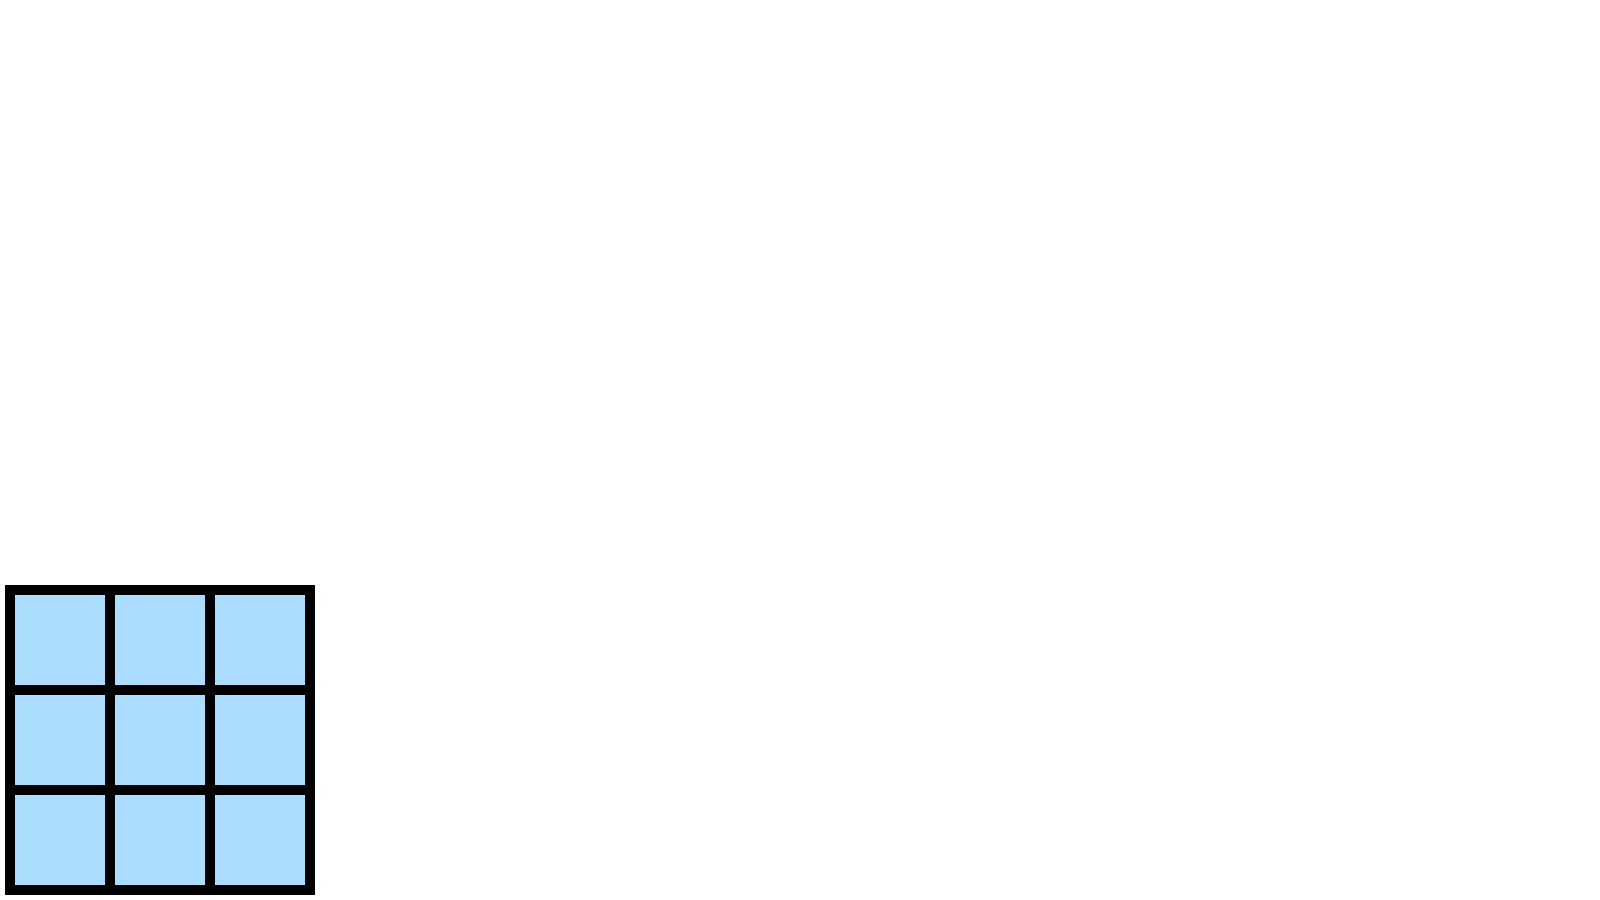

In [8]:
grid_width = 10
d = draw.Drawing(1600, 900, origin = (0, 0))
for x in range(output_dims[0]):
    for y in range(output_dims[1]):
        d.append(draw.Rectangle(100 * x + grid_width, 100 * y + grid_width, 
                                100, 100, 
                        stroke_width = grid_width, stroke = 'black',
                        fill = '#aaddff'))
d.rasterize()

In [9]:
binder = plaidml.exec.Binder(program)
executable = binder.compile()
executable.run()